## Lusa Dataset Exploratory Analysis

In [7]:
import collections
from pathlib import Path

from matplotlib import pyplot as plt

from src.reader import read_lusa

ROOT = Path().resolve().parent
DATA_PATH = ROOT / "resources" / "lusa"

In [8]:
documents = read_lusa(DATA_PATH)

print(f"Number of documents: {len(documents)}")

Number of documents: 120


The plot below shows the frequency of each annotation class in the Lusa dataset 

In [9]:
classes = [ann["type"] for doc in documents for ann in doc.annotations]
print(f"Number of classes: {len(set(classes))}")

class_count = collections.Counter(classes)

Number of classes: 15


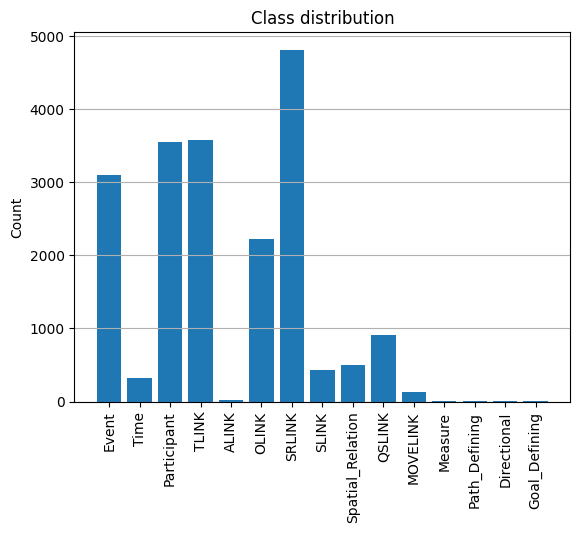

In [10]:
plt.bar(class_count.keys(), class_count.values())
plt.title("Class distribution")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

We choose the 6 more frequent classes for our analysis. Next, we analyse the attributes of each class to once again see the most frequent ones

In [11]:
def get_attribute_count(class_: str) -> collections.Counter:

    attribs2ignore = ["id", "type", "text", "offset"]
    attribute_count = collections.Counter()
    for doc in documents:
        for ann in doc.annotations:
            if ann["type"].lower() == class_.lower():
                for attrib in ann.keys():
                    if attrib not in attribs2ignore:
                        attribute_count[attrib] += 1
    return attribute_count

get_attribute_count("participant")

Counter({'lexical_head': 3543,
         'individuation_domain': 3539,
         'participant_type_domain': 3546,
         'involvement': 3542})

In [22]:
def plot_attribute_count(class_: str) -> None:
    attribute_count = get_attribute_count(class_)
    plt.bar(attribute_count.keys(), attribute_count.values())
    plt.title(f"Attribute distribution for class {class_.capitalize()}")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.grid(axis="y")
    plt.show()


In [ ]:
def get_attribute_value_count(class_: str, attribute: str) -> collections.Counter:
    attribute_value_count = collections.Counter()
    for doc in documents:
        for ann in doc.annotations:
            if ann["type"].lower() == class_.lower():
                for attrib in ann.keys():
                    if attrib.lower() == attribute.lower():
                        attribute_value_count[ann[attrib]] += 1
    return attribute_value_count

In [23]:
def plot_attribute_value_count(class_: str, attribute: str) -> None:
    attribute_value_count = get_attribute_value_count(class_, attribute)
    plt.bar(attribute_value_count.keys(), attribute_value_count.values())
    plt.title(f"Attributes class {class_.capitalize()} and attribute {attribute.capitalize()}")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.grid(axis="y")
    plt.show()

The formatted attribute count dictionary by class is presented below

In [25]:
selected_classes = [
    "Participant",
    "Time",
    "Event",
    "TLINK",
    "OLINK",
    "SRLINK"
]


## Events

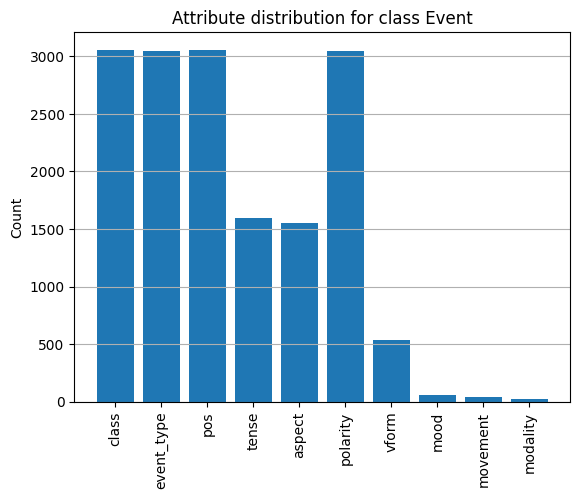

In [14]:
plot_attribute_count("Event")

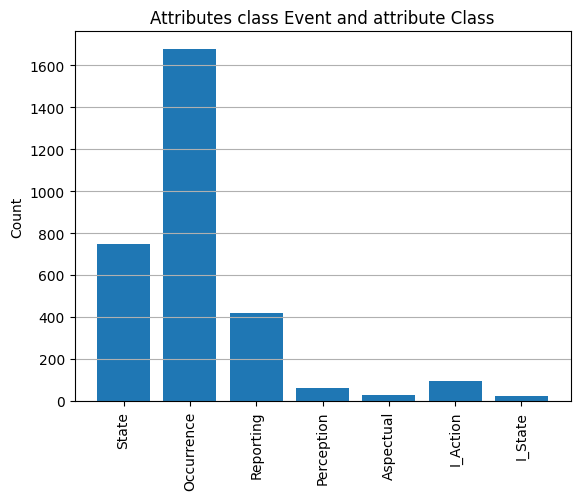

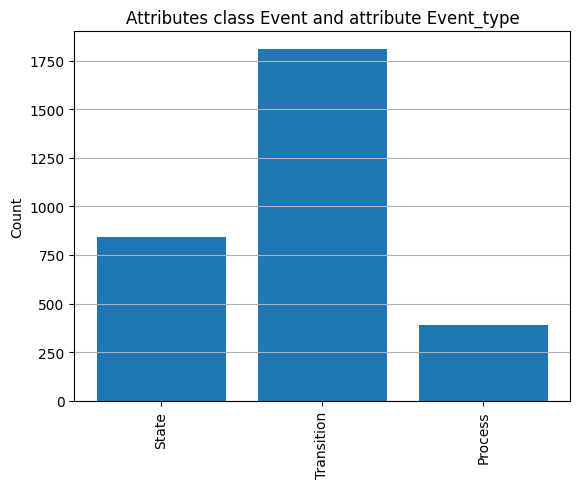

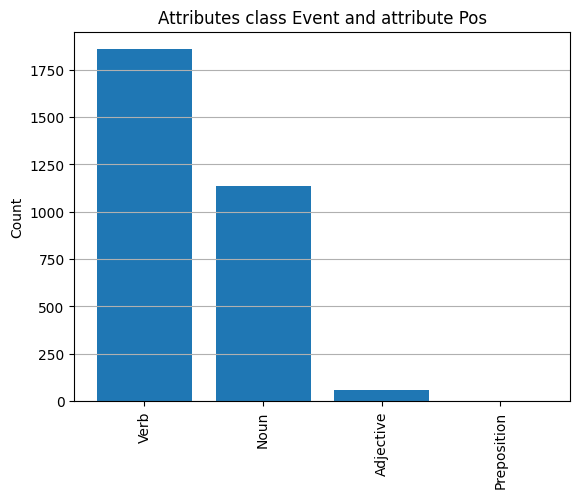

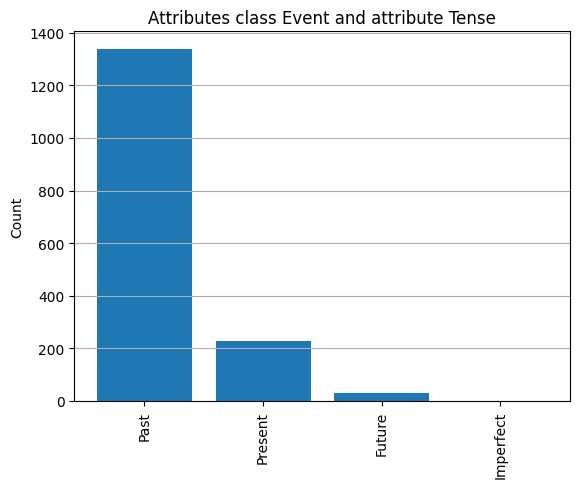

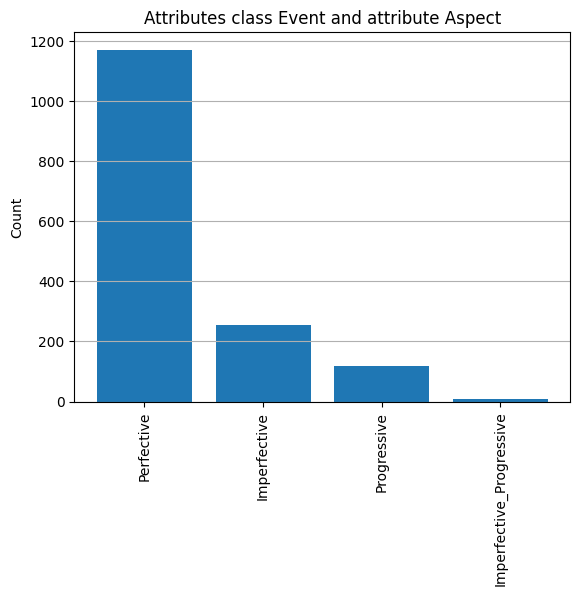

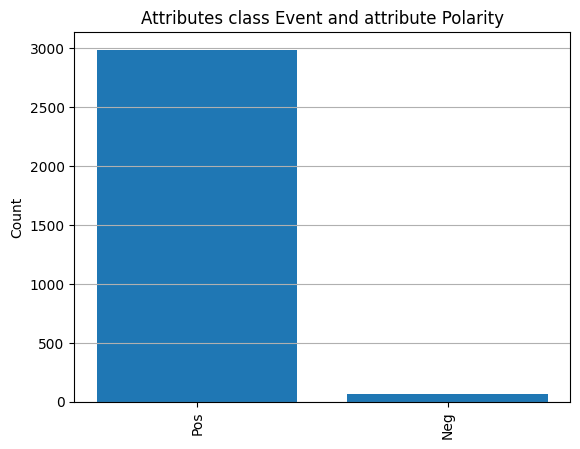

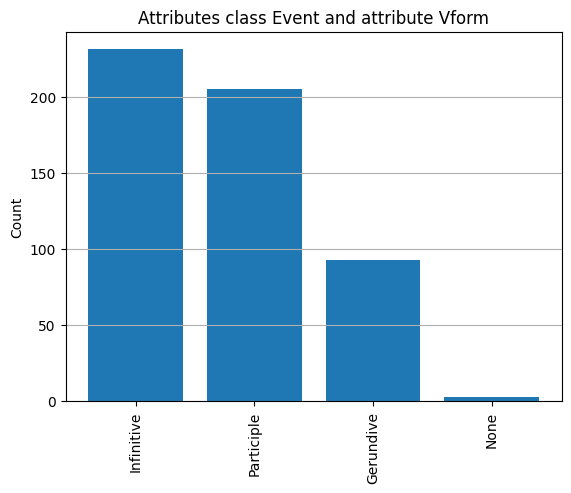

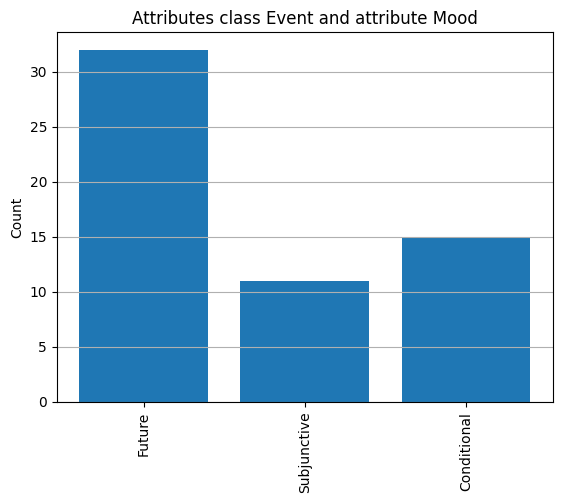

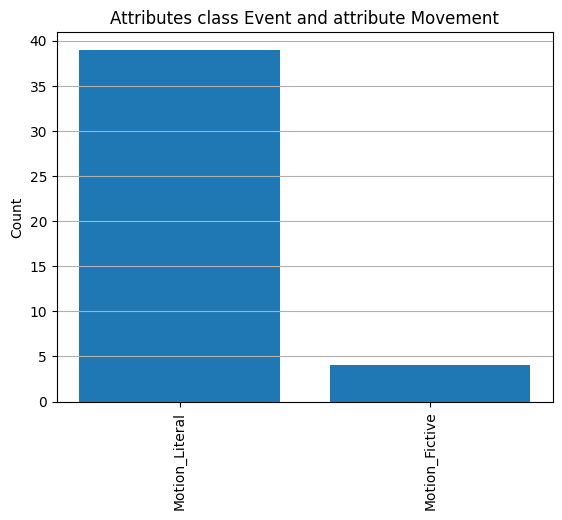

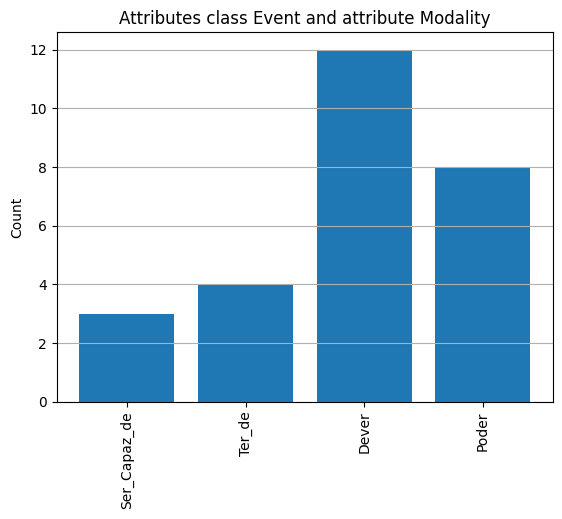

In [24]:
for attrib in ["class", "event_type", "pos", "tense", "aspect", "polarity", "vform", "mood", "movement", "modality"]:
    plot_attribute_value_count("Event", attrib)

## Timexs

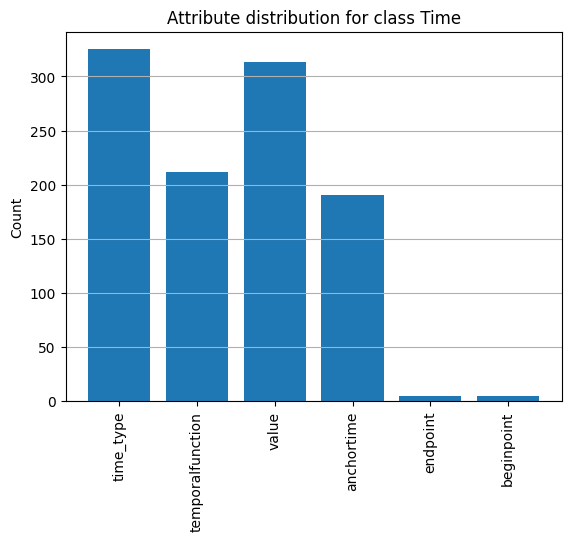

In [26]:
plot_attribute_count("Time")

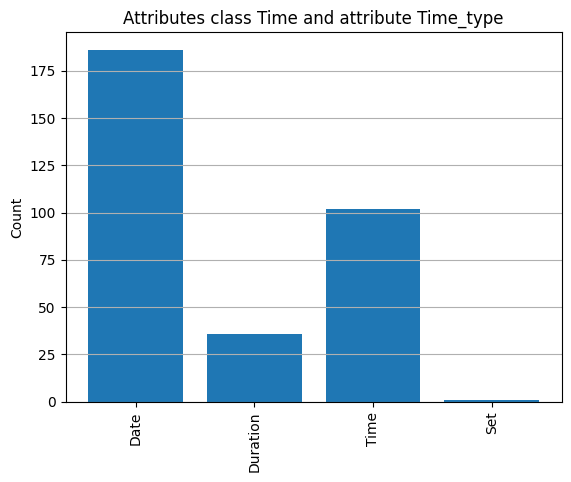

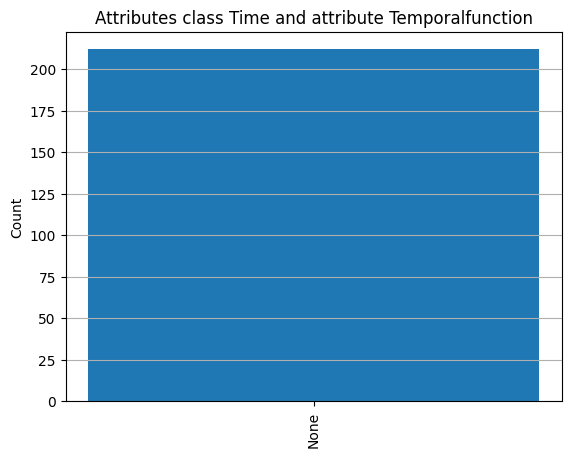

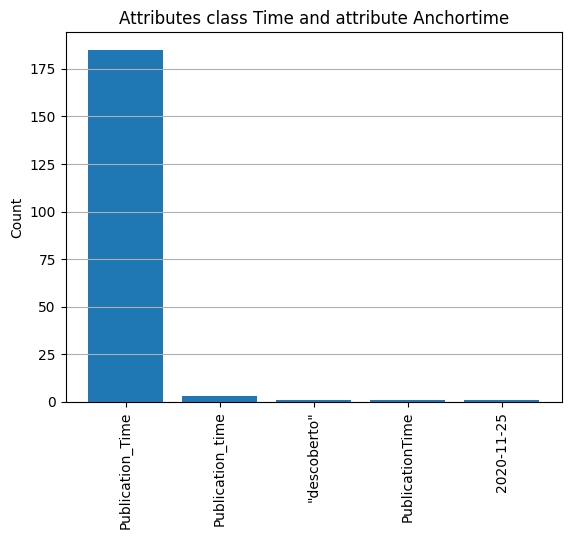

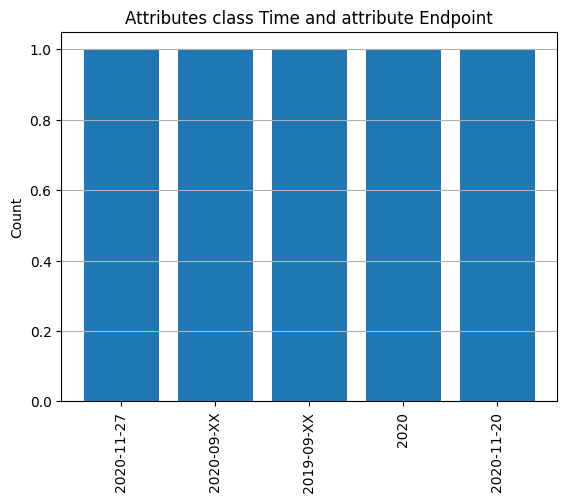

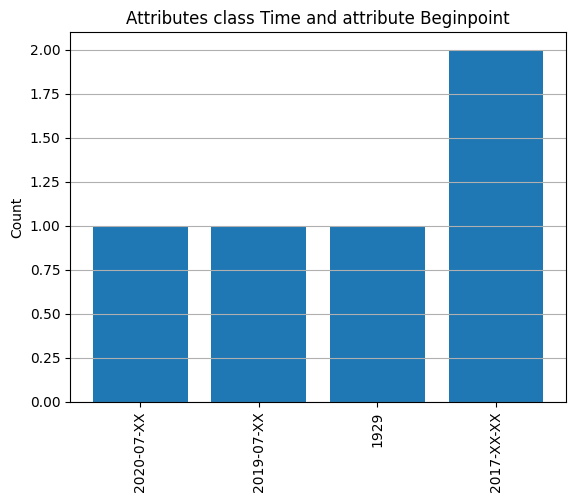

In [29]:
for attrib in ["time_Type", "temporalfunction", "anchortime", "endpoint", "beginpoint"]:
    plot_attribute_value_count("Time", attrib)

## Participants

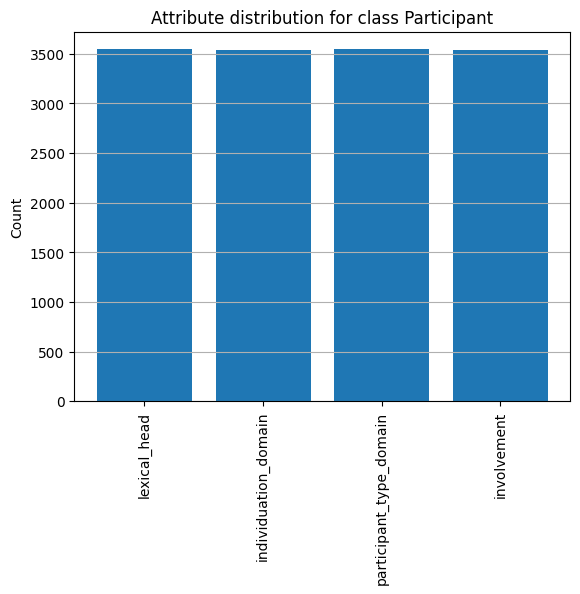

In [31]:
plot_attribute_count("Participant")

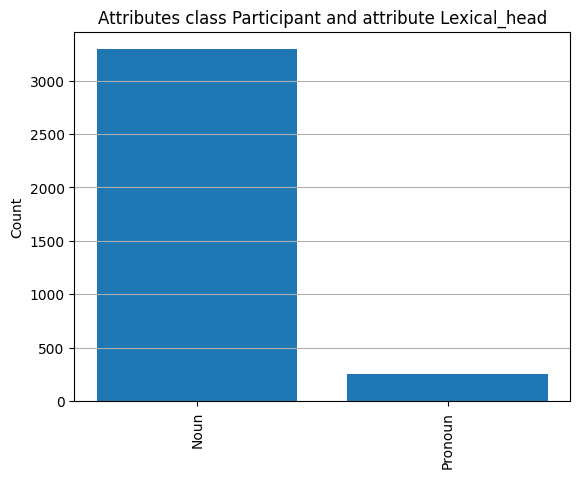

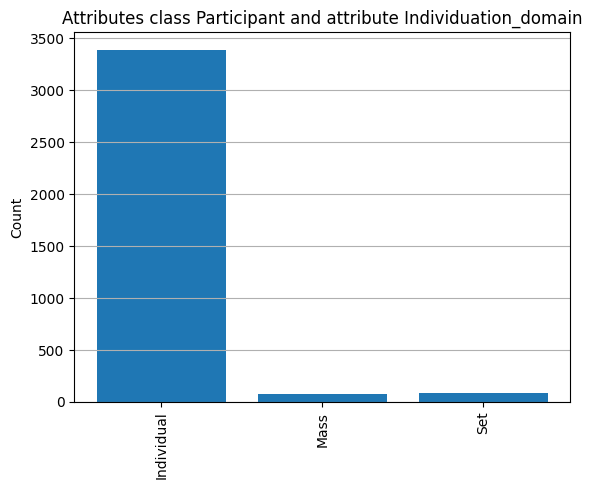

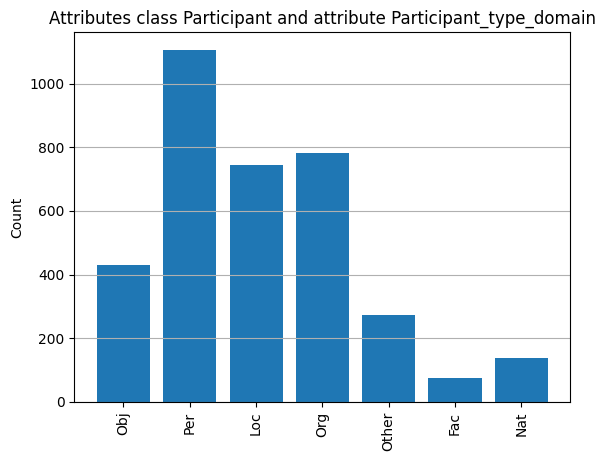

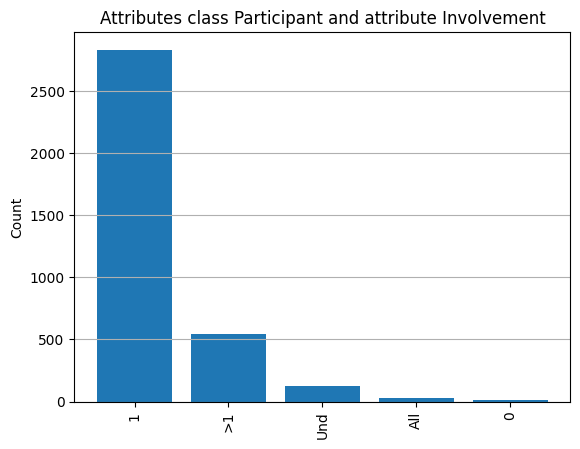

In [32]:
for attrib in ["lexical_head", "individuation_domain", "participant_type_domain", "involvement"]:
    plot_attribute_value_count("Participant", attrib)

## TLinks

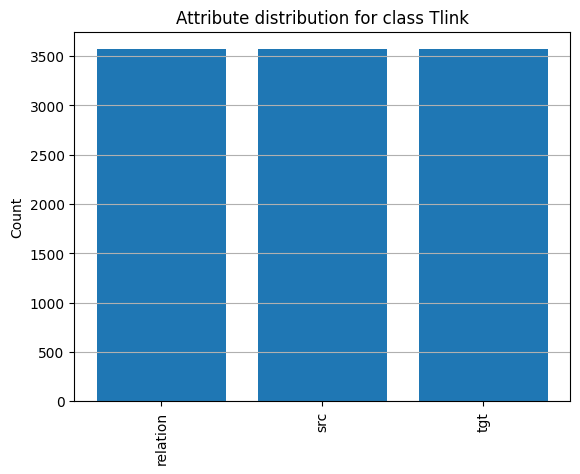

In [33]:
plot_attribute_count("Tlink")

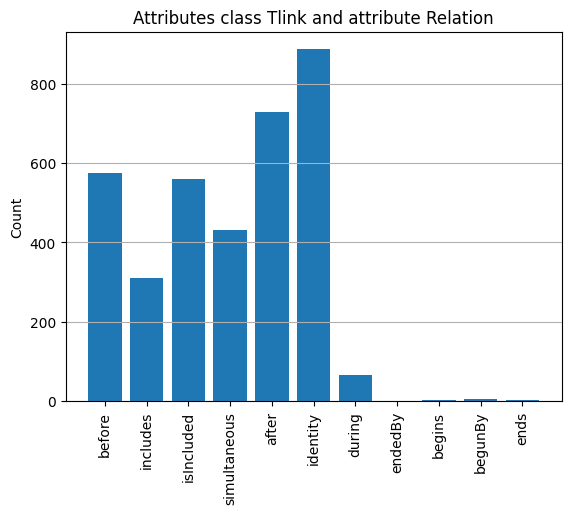

In [35]:
for attrib in ["relation"]:
    plot_attribute_value_count("tlink", attrib)

## OLinks

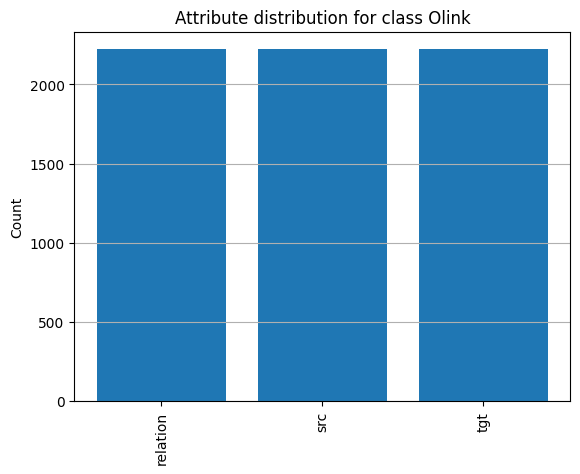

In [36]:
plot_attribute_count("olink")

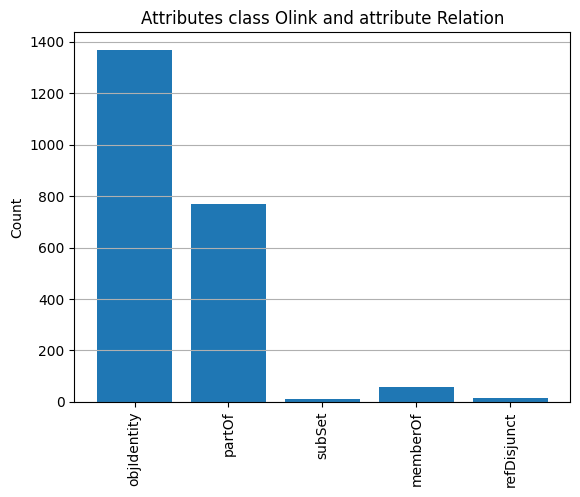

In [37]:
for attrib in ["relation"]:
    plot_attribute_value_count("olink", attrib)